# ***Introduction***

**Student Name-Surname** : Eray ŞAT

**Student ID** : 2022205255




I'll use the Diamond dataset from Kaggle for my project.


We have a dataset of 53,932 diamonds, each with information on 10 features such as carat, length, and so on.

**Features:\**






*   **Carat**: The unit of measurement for the physical weight of diamonds

*   **Cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

*   **Color**:Quality of the diamond colour, from J (worst) to D (best)
*   **Clarity**:A measurement of how clear the diamond are I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

*   **Depth** : Total depth percentage = z / mean(x, y) = 2 * z / (x + y)

*   **Table**: Width of top of diamond relative to widest point

*   **x** : The length of the diamond
*   **y** : The width of the diamond


*   **z** : The depth of the diamond




*   **Price**: The price in US dollars








The goal of this project is to predict the prices of diamonds based on their known features. I aim to observe the relationship between these features and the diamond prices. Additionally, I will examine the relationships among the diamond features themselves. I will also try to identify which feature has the most significant impact on the diamond's price.

# ***Dowlanding Dataset***









We start with dowlanding the data set on the Google Colab.


First, we should import some libraries.

In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'your_username'
os.environ['KAGGLE_KEY'] = 'your_key'


!kaggle datasets download -d shivam2503/diamonds

import zipfile
import pandas as pd

#Since the type of the dowlanding file is zip, we need to unzip the file.
with zipfile.ZipFile('diamonds.zip', 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv('diamonds.csv')
print(df.head())

Dataset URL: https://www.kaggle.com/datasets/shivam2503/diamonds
License(s): unknown
  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 17.4MB/s]
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


#***Explorety Data Anlaysis Part***

In [ ]:
# First look into the data.
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In order to access the categories more easily, I change their names to my comfort.

In [ ]:
# I do not want to use wierd label such as x, y, z or labels with starting lower letters.
df.rename(columns={'Unnamed: 0':'ID','carat': 'Carat','cut': 'Cut','color': 'Color', 'clarity': 'Clarity', 'depth': 'Depth Percentage', 'table': 'Table', 'price': 'Price', 'x': 'Length', 'y': 'Width','z': 'Depth' }, inplace=True)

## Handle Missing Values

Look at the data whether containg any missing value.

In [ ]:
df.isnull().sum()

ID                  0
Carat               0
Cut                 0
Color               0
Clarity             0
Depth Percentage    0
Table               0
Price               0
Length              0
Width               0
Depth               0
dtype: int64

There is no missing value with the form 'NaN'. Howewer,  the missing value may have been entered as 0. Many of the data contain the missing values in this type.

In [ ]:
for i in df.columns[1:]:
  contains_zero = 0 in df[i].values
  print("Is", i, "contain 0 :", contains_zero)

Is Carat contain 0 : False
Is Cut contain 0 : False
Is Color contain 0 : False
Is Clarity contain 0 : False
Is Depth Percentage contain 0 : False
Is Table contain 0 : False
Is Price contain 0 : False
Is Length contain 0 : True
Is Width contain 0 : True
Is Depth contain 0 : True


Clearly, the width, length and depth of a diamond cannot be 0. We need to fill in this data or remove it from our dataset.

First, let's see the rows containing a total missing value by finding the rows where any of these three categories are zero.

At the same time, the three categories can contain the missing value. Therefore, we search the rows containing at least one missing value which is zero.

Observe that in the all rows containg the missing values, the depth is zero.


In [ ]:
rows_containing_at_least_one_zero = df.query('Length == 0 or Width == 0 or Depth == 0')

print("The number of rows containing at least one missing value:",rows_containing_at_least_one_zero.value_counts().sum())
rows_containing_at_least_one_zero

The number of rows containing at least one missing value: 20


ID  Carat        Cut Color Clarity  Depth Percentage  Table  Price  \
2207    2208   1.00    Premium     G     SI2              59.1   59.0   3142   
2314    2315   1.01    Premium     H      I1              58.1   59.0   3167   
4791    4792   1.10    Premium     G     SI2              63.0   59.0   3696   
5471    5472   1.01    Premium     F     SI2              59.2   58.0   3837   
10167  10168   1.50       Good     G      I1              64.0   61.0   4731   
11182  11183   1.07      Ideal     F     SI2              61.6   56.0   4954   
11963  11964   1.00  Very Good     H     VS2              63.3   53.0   5139   
13601  13602   1.15      Ideal     G     VS2              59.2   56.0   5564   
15951  15952   1.14       Fair     G     VS1              57.5   67.0   6381   
24394  24395   2.18    Premium     H     SI2              59.4   61.0  12631   
24520  24521   1.56      Ideal     G     VS2              62.2   54.0  12800   
26123  26124   2.25    Premium     I     SI1              61.3   58.0  15397   
26243  26244   1.20    Premium     D    VVS1              62.1   59.0  15686   
27112  27113   2.20    Premium     H     SI1              61.2   59.0  17265   
27429  27430   2.25    Premium     H     SI2              62.8   59.0  18034   
27503  27504   2.02    Premium     H     VS2              62.7   53.0  18207   
27739  27740   2.80       Good     G     SI2              63.8   58.0  18788   
49556  49557   0.71       Good     F     SI2              64.1   60.0   2130   
49557  49558   0.71       Good     F     SI2              64.1   60.0   2130   
51506  51507   1.12    Premium     G      I1              60.4   59.0   2383   

       Length  Width  Depth  
2207     6.55   6.48    0.0  
2314     6.66   6.60    0.0  
4791     6.50   6.47    0.0  
5471     6.50   6.47    0.0  
10167    7.15   7.04    0.0  
11182    0.00   6.62    0.0  
11963    0.00   0.00    0.0  
13601    6.88   6.83    0.0  
15951    0.00   0.00    0.0  
24394    8.49   8.45    0.0  
24520    0.00   0.00    0.0  
26123    8.52   8.42    0.0  
26243    0.00   0.00    0.0  
27112    8.42   8.37    0.0  
27429    0.00   0.00    0.0  
27503    8.02   7.95    0.0  
27739    8.90   8.85    0.0  
49556    0.00   0.00    0.0  
49557    0.00   0.00    0.0  
51506    6.71   6.67    0.0

As seen in the table above, there are three types of problematic rows. While the first type of rows do not contain any of the length, width, and depth values. The second type of rows does not only contain a depth value. It is easy to solve the problem in the second type of row because depth percentage is obtained with the formula 2*(depth)/(length + width). To solve the problem in the first type of rows, we need to either delete these rows or fill any two categories with average values ​​and obtain the third one with the depth percentage formula. Finally, there is third type of row which has two zero categorical value.

I will fill the missing value in the second type of row. However, I will not fill missing values in the first and third types of rows because there are so rare according to our total number of data.

We will begin with filling the rows containg 0 only in the depth categor, which is the missing value in the second type of rows.


In [ ]:
rows_zero_depth = df.loc[(df['Length'] != 0) & (df['Width'] != 0) & (df['Depth'] == 0)]
rows_zero_depth

ID  Carat      Cut Color Clarity  Depth Percentage  Table  Price  \
2207    2208   1.00  Premium     G     SI2              59.1   59.0   3142   
2314    2315   1.01  Premium     H      I1              58.1   59.0   3167   
4791    4792   1.10  Premium     G     SI2              63.0   59.0   3696   
5471    5472   1.01  Premium     F     SI2              59.2   58.0   3837   
10167  10168   1.50     Good     G      I1              64.0   61.0   4731   
13601  13602   1.15    Ideal     G     VS2              59.2   56.0   5564   
24394  24395   2.18  Premium     H     SI2              59.4   61.0  12631   
26123  26124   2.25  Premium     I     SI1              61.3   58.0  15397   
27112  27113   2.20  Premium     H     SI1              61.2   59.0  17265   
27503  27504   2.02  Premium     H     VS2              62.7   53.0  18207   
27739  27740   2.80     Good     G     SI2              63.8   58.0  18788   
51506  51507   1.12  Premium     G      I1              60.4   59.0   2383   

       Length  Width  Depth  
2207     6.55   6.48    0.0  
2314     6.66   6.60    0.0  
4791     6.50   6.47    0.0  
5471     6.50   6.47    0.0  
10167    7.15   7.04    0.0  
13601    6.88   6.83    0.0  
24394    8.49   8.45    0.0  
26123    8.52   8.42    0.0  
27112    8.42   8.37    0.0  
27503    8.02   7.95    0.0  
27739    8.90   8.85    0.0  
51506    6.71   6.67    0.0

Now, we can fill. Take the value of the length and the width of the each row, and calculate the depth of the each row.
Depth Percentage = (2 x Depth) / (Length + Width)
Then,
Depth = (Depth Percentage x (Length + Width))/2

In [ ]:
# Write a funtion filling the missing values, then put it into the loop.
def depth_calculator(row):
    percentage_value = row['Depth Percentage']
    length_value = row['Length']
    width_value = row['Width']
    depth_value = (percentage_value * (length_value + width_value))/2
    return depth_value

zero_indices = df.index[(df['Depth'] == 0) & (df['Length'] != 0) & (df['Width'] != 0)].tolist()

for index in zero_indices:
    depth_value = depth_calculator(df.loc[index])
    df.at[index, 'Depth'] = depth_value

# After filling the some of the missing valeus, look at the other missing values.


df.loc[df['Depth'] == 0] # Since the in all rows containg missing valeus, the depth is zero.


Empty DataFrame
Columns: [ID, Carat, Cut, Color, Clarity, Depth Percentage, Table, Price, Length, Width, Depth]
Index: []

Now, we can see that there is no rows containing 0 in only the Depth category.

I will delete the other 0 lines because making a random guess would be meaningless in a situation where there are three unknowns. There is only one situation with two unknowns. This is an amount we can delete for the size of the data we have.

In [ ]:
df = df[df['Depth'] != 0] # Access only the rows containing zero in the depth category because in the begining we find the fact that the depth category contains zero in the all rows containing missing values.
df.query('Length == 0 or Width == 0 or Depth == 0')


Empty DataFrame
Columns: [ID, Carat, Cut, Color, Clarity, Depth Percentage, Table, Price, Length, Width, Depth]
Index: []

We can see that there is no row contaiing zero in the categories length, width, and depth. This means there is no missing value now.

## Duplicate Entires


Now, we should consdir the duplicated entries.

In [ ]:
duplicates = df.duplicated()
duplicate_rows = df[df.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [ID, Carat, Cut, Color, Clarity, Depth Percentage, Table, Price, Length, Width, Depth]
Index: []

There is no duplicate row.

## Convert Data Types

Now,  we  should convert the data types of clartiy, color, and cut.  There are ordinal variables because they have order.

First, we learn the element in the categories.

In [ ]:
print(df['Color'].unique())
print(df['Clarity'].unique())
print(df['Cut'].unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


We can see that the category Color containing the letters 'E', 'I', 'J', 'H', 'F', 'G', 'D'.
The order of the letters from worst to best is: J, I H, G, F, E, D

We can see that the category Clarity containing the code 'SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF'. The order of the letters from worst to best is: I1 , SI2, SI1, VS2, VS1, VVS2, VVS1, IF.

Also, We can see that the category Cut containing the feature 'Ideal' 'Premium' 'Good' 'Very Good' 'Fair'. The order of the letters from worst to best is: Fair, Good, Very Good, Premium, Ideal.

Since these three categorical variables are ordinal, we can use the label encoding method to convert these categories into numerical values.

We will use label encoding method.

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

label_encoder_cut = LabelEncoder()
label_encoder_clarity = LabelEncoder()
label_encoder_color = LabelEncoder()

df['Cut_encoded'] = label_encoder_cut.fit_transform(df['Cut'])

clarity_order = np.array(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
label_encoder_clarity.classes_ = clarity_order
df['Clarity_encoded'] = label_encoder_clarity.transform(df['Clarity'])

color_order = np.array(['J', 'I', 'H', 'G', 'F', 'E', 'D'])
label_encoder_color.classes_ = color_order
df['Color_encoded'] = label_encoder_color.transform(df['Color'])

df


ID  Carat        Cut Color Clarity  Depth Percentage  Table  Price  \
0          1   0.23      Ideal     E     SI2              61.5   55.0    326   
1          2   0.21    Premium     E     SI1              59.8   61.0    326   
2          3   0.23       Good     E     VS1              56.9   65.0    327   
3          4   0.29    Premium     I     VS2              62.4   58.0    334   
4          5   0.31       Good     J     SI2              63.3   58.0    335   
...      ...    ...        ...   ...     ...               ...    ...    ...   
53935  53936   0.72      Ideal     D     SI1              60.8   57.0   2757   
53936  53937   0.72       Good     D     SI1              63.1   55.0   2757   
53937  53938   0.70  Very Good     D     SI1              62.8   60.0   2757   
53938  53939   0.86    Premium     H     SI2              61.0   58.0   2757   
53939  53940   0.75      Ideal     D     SI2              62.2   55.0   2757   

       Length  Width  Depth  Cut_encoded  Clarity_encoded  Color_encoded  
0        3.95   3.98   2.43            2                1              5  
1        3.89   3.84   2.31            3                2              5  
2        4.05   4.07   2.31            1                4              5  
3        4.20   4.23   2.63            3                3              1  
4        4.34   4.35   2.75            1                1              0  
...       ...    ...    ...          ...              ...            ...  
53935    5.75   5.76   3.50            2                2              6  
53936    5.69   5.75   3.61            1                2              6  
53937    5.66   5.68   3.56            4                2              6  
53938    6.15   6.12   3.74            3                1              2  
53939    5.83   5.87   3.64            2                1              6  

[53932 rows x 14 columns]

## Descriptive Statistics

In [ ]:
df.describe()

ID         Carat  Depth Percentage         Table  \
count  53932.00000  53932.000000      53932.000000  53932.000000   
mean   26970.48804      0.797879         61.749336     57.457029   
std    15571.46971      0.473986          1.432514      2.234064   
min        1.00000      0.200000         43.000000     43.000000   
25%    13485.75000      0.400000         61.000000     56.000000   
50%    26971.50000      0.700000         61.800000     57.000000   
75%    40455.25000      1.040000         62.500000     59.000000   
max    53940.00000      5.010000         79.000000     95.000000   

              Price        Length         Width         Depth   Cut_encoded  \
count  53932.000000  53932.000000  53932.000000  53932.000000  53932.000000   
mean    3932.136079      5.732007      5.735254      3.639935      2.553085   
std     3988.734835      1.119670      1.140343      6.795973      1.027654   
min      326.000000      3.730000      3.680000      1.070000      0.000000   
25%      949.750000      4.710000      4.720000      2.910000      2.000000   
50%     2401.000000      5.700000      5.710000      3.530000      2.000000   
75%     5324.000000      6.540000      6.540000      4.040000      3.000000   
max    18823.000000     10.740000     58.900000    566.225000      4.000000   

       Clarity_encoded  Color_encoded  
count     53932.000000   53932.000000  
mean          3.051101       3.405789  
std           1.647109       1.701165  
min           0.000000       0.000000  
25%           2.000000       2.000000  
50%           3.000000       3.000000  
75%           4.000000       5.000000  
max           7.000000       6.000000


The average price seems quite far from the maximum price; the difference is significant. The price distribution between 0-5000 might be considerably higher compared to other ranges.

The same situation applies to width and depth as well.







Additionally, to observe the categorical variables, we will examine the distributions of these categories.

In [ ]:
categorical_variables = ['Color', 'Cut', 'Clarity']

for i in categorical_variables:
  categorical_counts = df[i].value_counts()

  print(categorical_counts)

Color
G    11290
E     9797
F     9539
H     8302
D     6774
I     5422
J     2808
Name: count, dtype: int64
Cut
Ideal        21549
Premium      13789
Very Good    12081
Good          4904
Fair          1609
Name: count, dtype: int64
Clarity
SI1     13065
VS2     12256
SI2      9190
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        741
Name: count, dtype: int64


The characteristics of the categories do not seem to be evenly distributed.

Now, let's also look at pie charts.

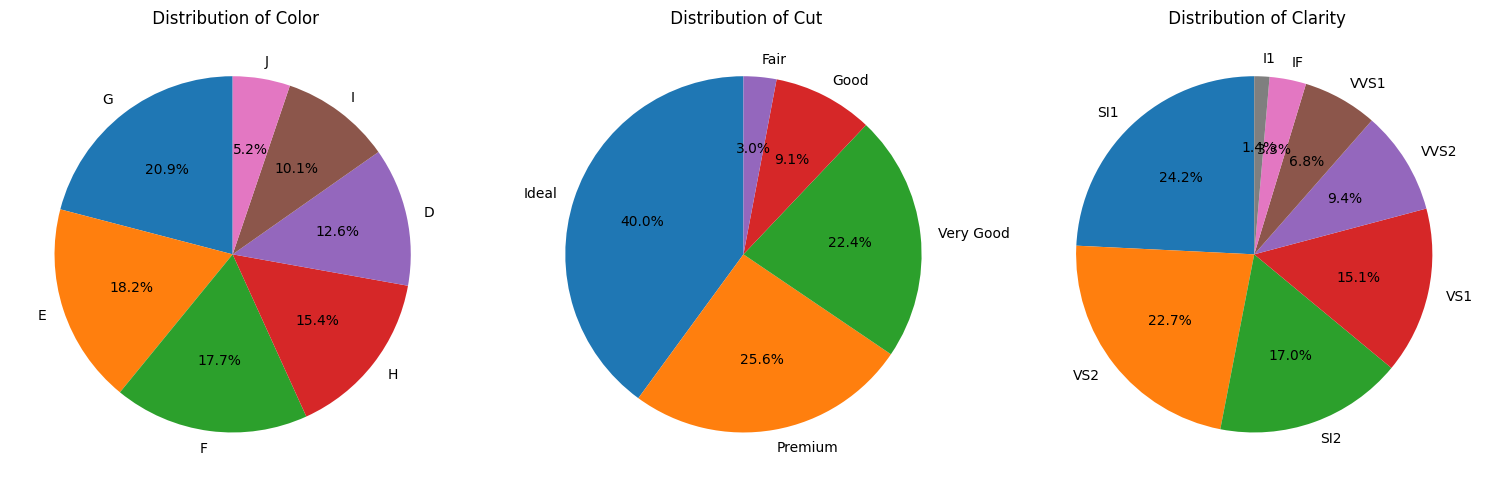

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

for i, var in enumerate(categorical_variables, 1):
    plt.subplot(1, 3, i)
    df[var].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f' Distribution of {var}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

We can see that some attributes are dominant in all three categories. However, our dataset is quite large, so an attribute occupying 5% of the distribution corresponds to 2500 data points. Therefore, these attributes are valuable to us.

These observations are valid for the color and cut categories. However, the distribution in the clarity category seems to resemble a normal distribution. Now, let's try to prove this with a histogram.







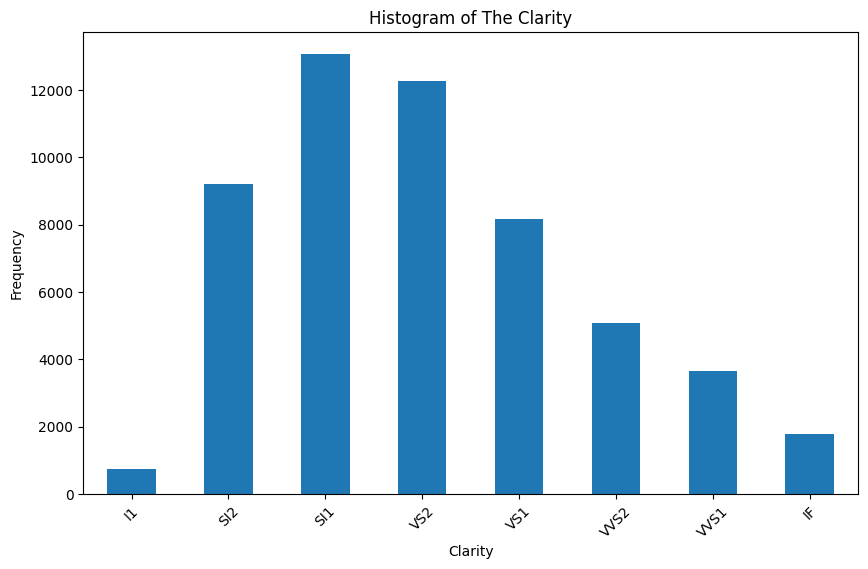

In [ ]:
df['Clarity'] = pd.Categorical(df['Clarity'], categories=clarity_order, ordered=True)

plt.figure(figsize=(10, 6))
df['Clarity'].value_counts(sort=False).plot(kind='bar')
plt.title('Histogram of The Clarity')
plt.xlabel('Clarity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

This seems like a normal distribution. So there is no problem.

## Outlier Detection

There might be outliers in the Width and Depth because their average seems quite far from their maximum; the difference is significant.

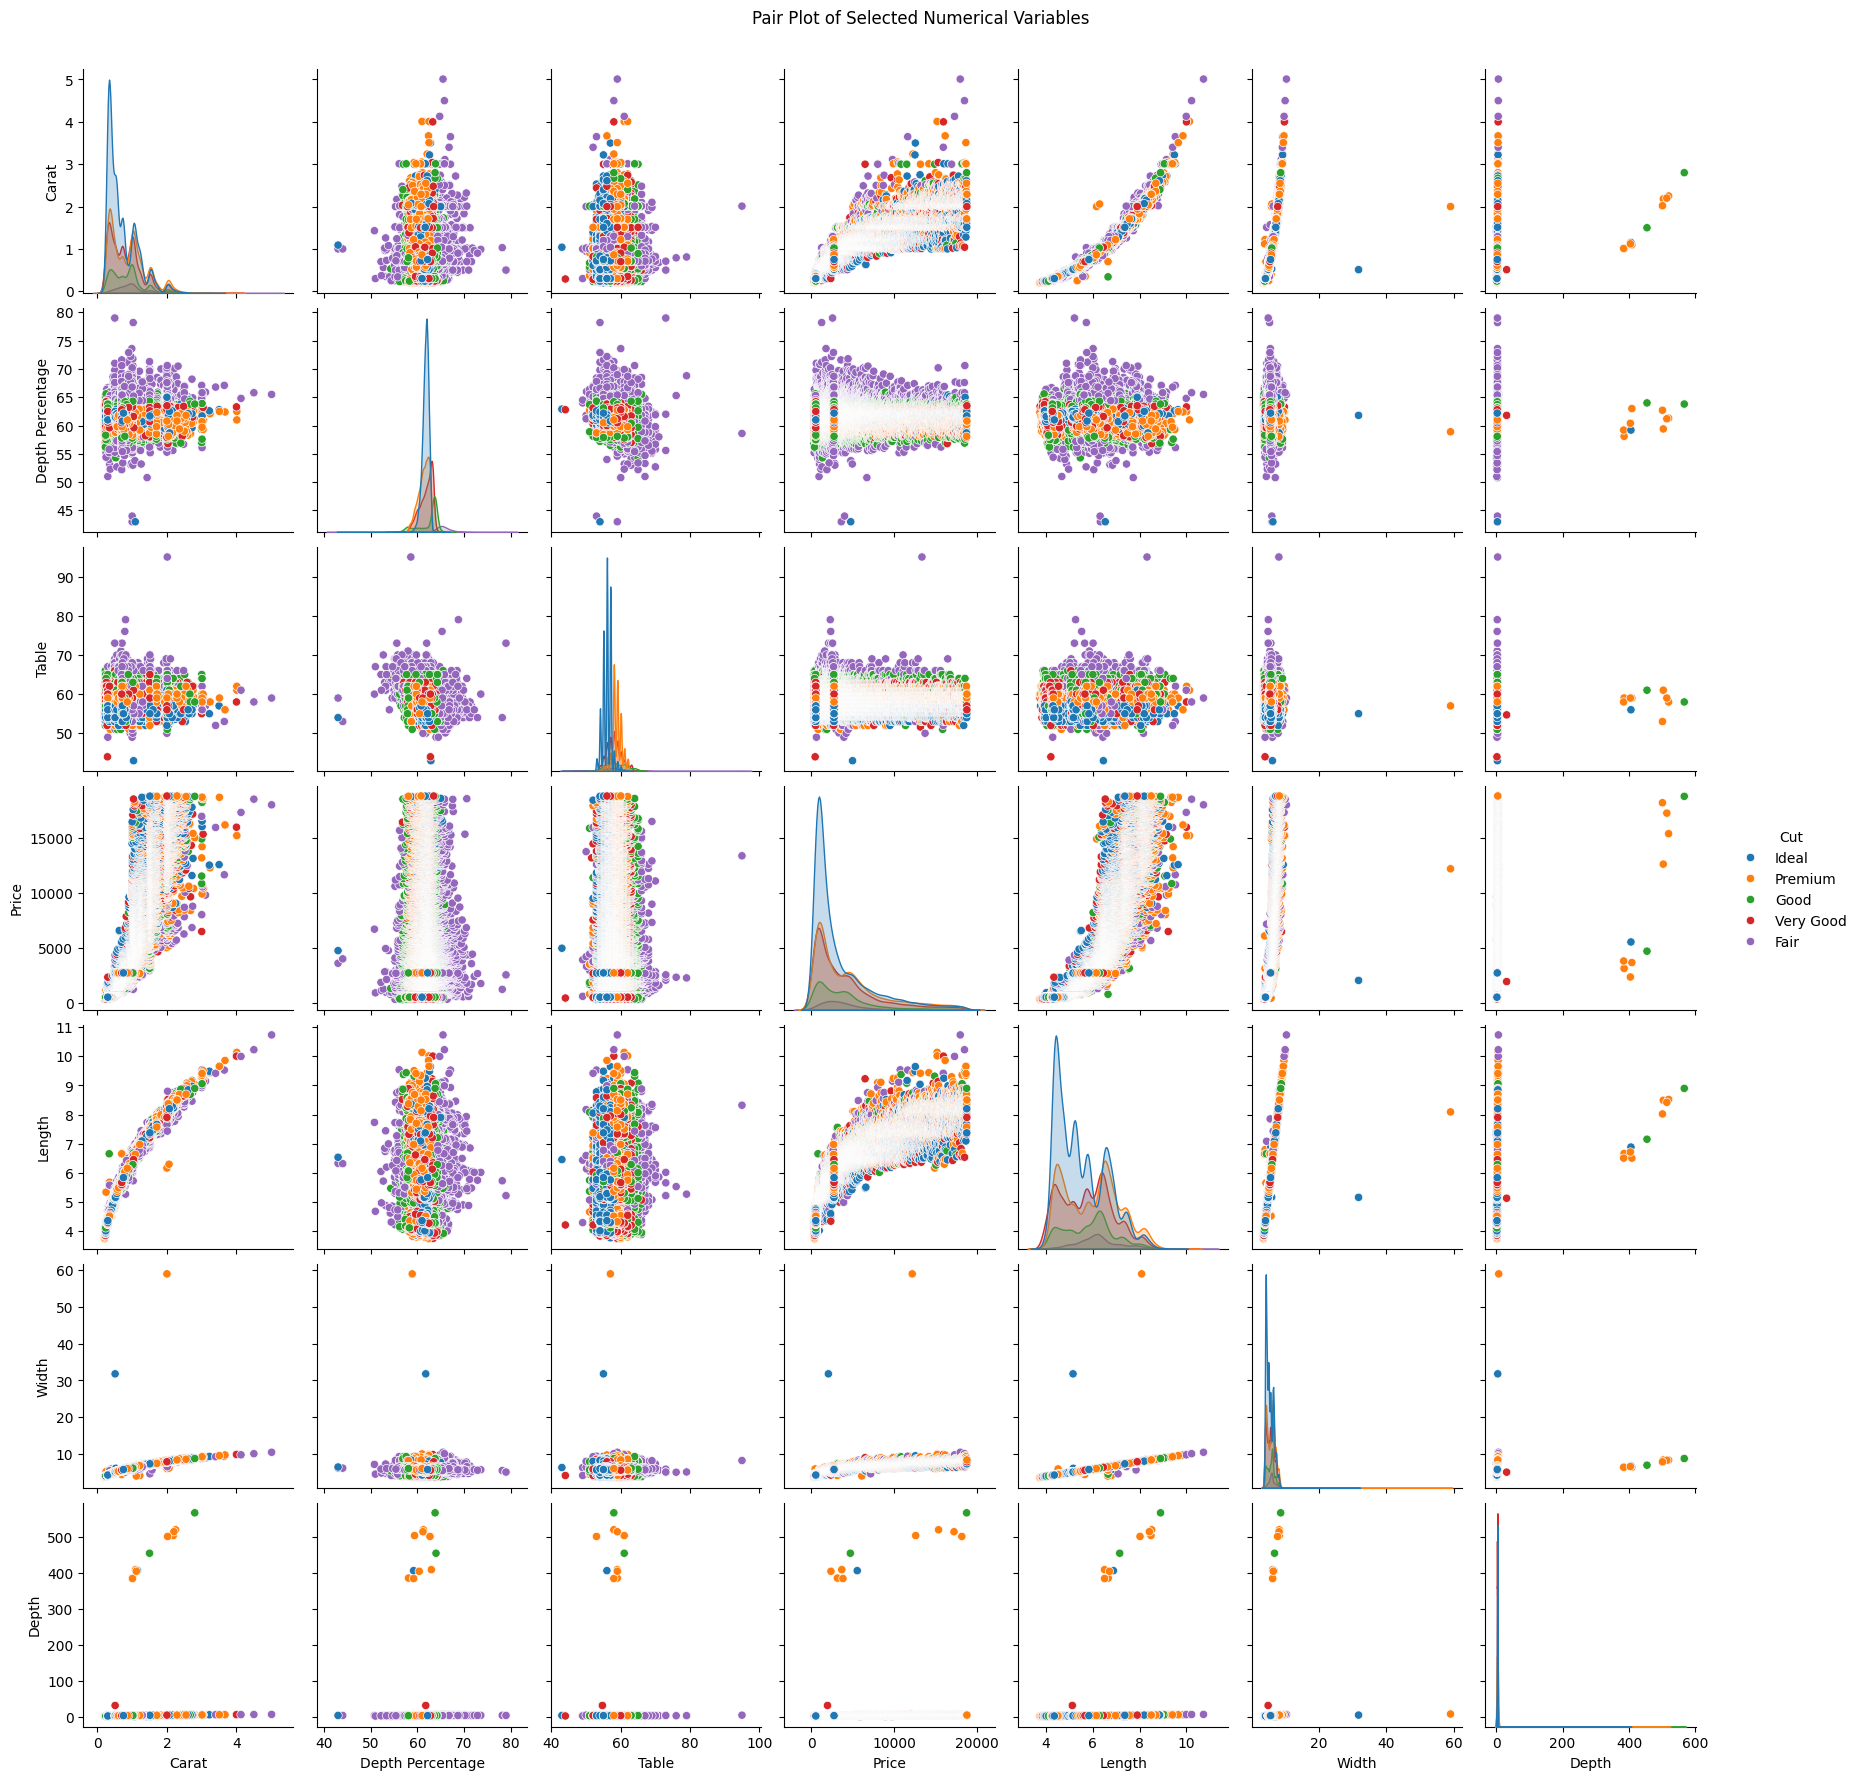

In [ ]:
numerical_vars = ['Carat', 'Depth Percentage', 'Table', 'Price', 'Length', 'Width', 'Depth']
sns.pairplot(df, hue='Cut', x_vars =numerical_vars, y_vars= numerical_vars, diag_kind='kde')
plt.suptitle("Pair Plot of Selected Numerical Variables", y=1.02)
plt.show()

"Length", "width", and "depth" categories appear to have outliers.

At first glance, values above 300 for the "depth" category and 30 for the "width" category seem like outliers.

Additionally, for the "table" category, values above 90 appear to be outliers.







Let's see the rows where the depth value is higher than 300.







In [ ]:
depth_greater_than_300 = df[df['Depth'] > 300]
depth_greater_than_300

ID  Carat      Cut Color Clarity  Depth Percentage  Table  Price  \
2207    2208   1.00  Premium     G     SI2              59.1   59.0   3142   
2314    2315   1.01  Premium     H      I1              58.1   59.0   3167   
4791    4792   1.10  Premium     G     SI2              63.0   59.0   3696   
5471    5472   1.01  Premium     F     SI2              59.2   58.0   3837   
10167  10168   1.50     Good     G      I1              64.0   61.0   4731   
13601  13602   1.15    Ideal     G     VS2              59.2   56.0   5564   
24394  24395   2.18  Premium     H     SI2              59.4   61.0  12631   
26123  26124   2.25  Premium     I     SI1              61.3   58.0  15397   
27112  27113   2.20  Premium     H     SI1              61.2   59.0  17265   
27503  27504   2.02  Premium     H     VS2              62.7   53.0  18207   
27739  27740   2.80     Good     G     SI2              63.8   58.0  18788   
51506  51507   1.12  Premium     G      I1              60.4   59.0   2383   

       Length  Width     Depth  Cut_encoded  Clarity_encoded  Color_encoded  
2207     6.55   6.48  385.0365            3                1              3  
2314     6.66   6.60  385.2030            3                0              2  
4791     6.50   6.47  408.5550            3                1              3  
5471     6.50   6.47  383.9120            3                1              4  
10167    7.15   7.04  454.0800            1                0              3  
13601    6.88   6.83  405.8160            2                3              3  
24394    8.49   8.45  503.1180            3                1              2  
26123    8.52   8.42  519.2110            3                2              1  
27112    8.42   8.37  513.7740            3                2              2  
27503    8.02   7.95  500.6595            3                3              2  
27739    8.90   8.85  566.2250            1                1              3  
51506    6.71   6.67  404.0760            3                0              3

Now, let's take a look at these outliers using a boxplot.







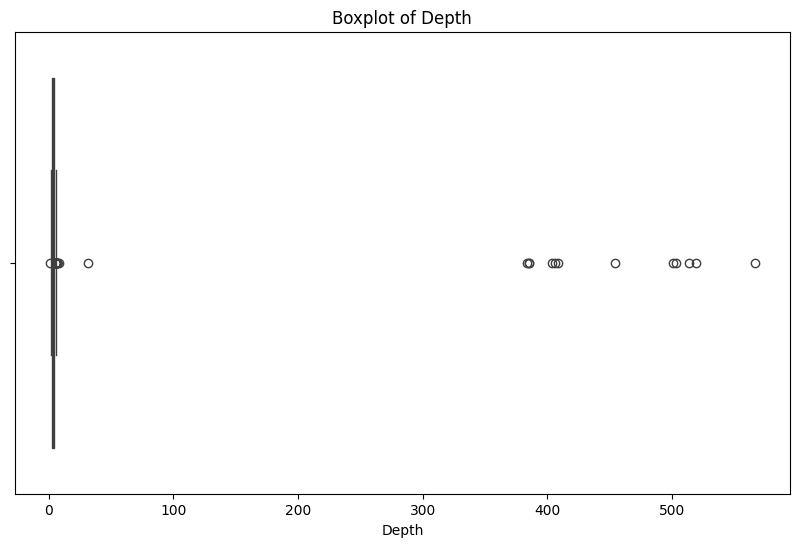

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Depth'])
plt.title('Boxplot of Depth')
plt.xlabel('Depth')
plt.show()

When we look at the depth boxplot now, we see another outlier between 0 and 100. It appears to be above 30.







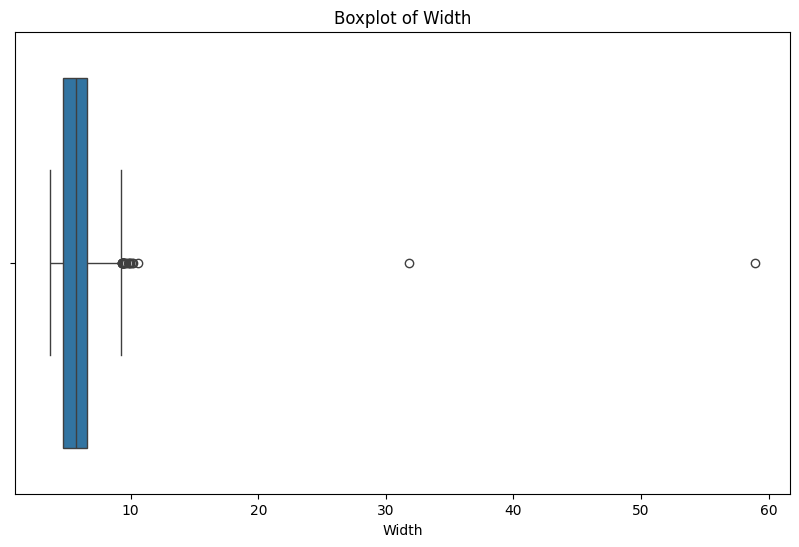

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Width'])
plt.title('Boxplot of Width')
plt.xlabel('Width')
plt.show()

The outliers for width are observed exactly as we observed them in the pair plot.







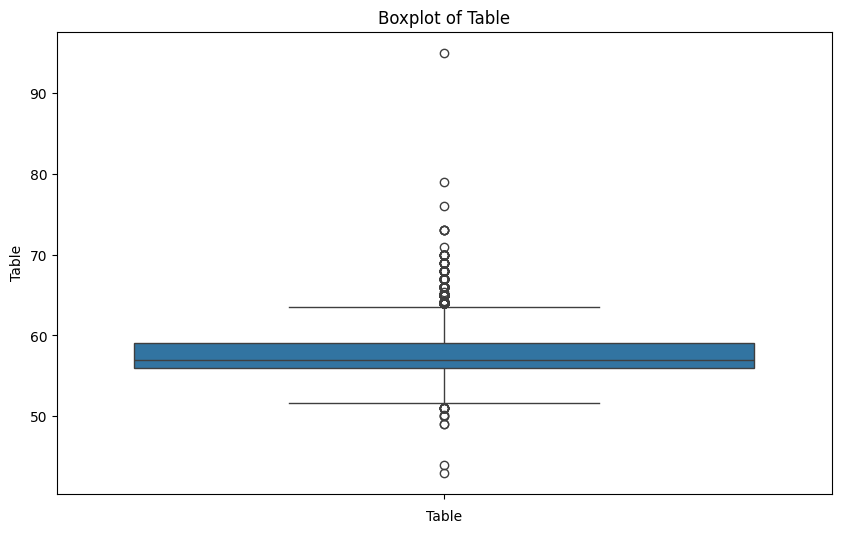

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Table'])
plt.title('Boxplot of Table')
plt.xlabel('Table')
plt.show()

The outliers for table are observed exactly as we observed them in the pair plot.







We'll remove values higher than 30 for depth and width and higher than 90 for the table.







In [ ]:
clean_df = df[(df['Depth'] <= 30) & (df['Width'] <= 30) & (df['Table'] <= 90)]

In [ ]:
clean_df[(clean_df['Depth'] > 30) | (clean_df['Width'] > 30) | (clean_df['Table'] > 90) ]

Empty DataFrame
Columns: [ID, Carat, Cut, Color, Clarity, Depth Percentage, Table, Price, Length, Width, Depth, Cut_encoded, Clarity_encoded, Color_encoded]
Index: []

There is no row with these outliers.

Now, let's show the boxplots again for these three categories.







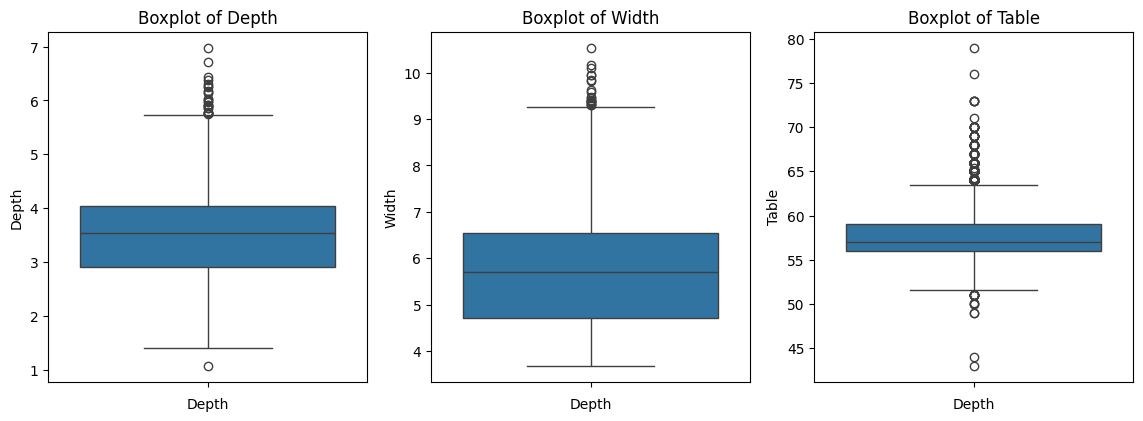

In [ ]:

plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
sns.boxplot(clean_df['Depth'])
plt.title('Boxplot of Depth')
plt.xlabel('Depth')
plt.subplot(2,3,2)

sns.boxplot(clean_df['Width'])
plt.title('Boxplot of Width')
plt.xlabel('Width')
plt.subplot(2,3,3)

sns.boxplot(clean_df['Table'])
plt.title('Boxplot of Table')
plt.xlabel('Table')
plt.show()

Now, we'll remove values less than 1.2 for depth, values greater than 73 and less than 45 for table.







In [ ]:
clean_df[(clean_df['Depth'] < 1.2) | (clean_df['Table'] < 45) | (clean_df['Table'] > 73) ]

ID  Carat        Cut Color Clarity  Depth Percentage  Table  Price  \
11368  11369   1.04      Ideal     I     VS1              62.9   43.0   4997   
14635  14636   1.07      Ideal     F     SI1              60.6   57.0   5909   
35633  35634   0.29  Very Good     E     VS1              62.8   44.0    474   
50773  50774   0.81       Fair     F     SI2              68.8   79.0   2301   
51342  51343   0.79       Fair     G     SI1              65.3   76.0   2362   

       Length  Width  Depth  Cut_encoded  Clarity_encoded  Color_encoded  
11368    6.45   6.41   4.04            2                4              1  
14635    6.62   6.67   1.07            2                2              4  
35633    4.20   4.24   2.65            4                4              5  
50773    5.26   5.20   3.58            0                1              4  
51342    5.52   5.13   3.35            0                2              3

There are five rows.

Now, remove these rows.

In [ ]:
clean_df = clean_df[(clean_df['Depth'] >= 1.2) & (clean_df['Table'] >= 45) & (clean_df['Table'] <= 73) ]

In [ ]:
clean_df[(clean_df['Depth'] < 1.2) | (clean_df['Table'] < 45) | (clean_df['Table'] > 73) ]

Empty DataFrame
Columns: [ID, Carat, Cut, Color, Clarity, Depth Percentage, Table, Price, Length, Width, Depth, Cut_encoded, Clarity_encoded, Color_encoded]
Index: []

There is no row with these outliers.

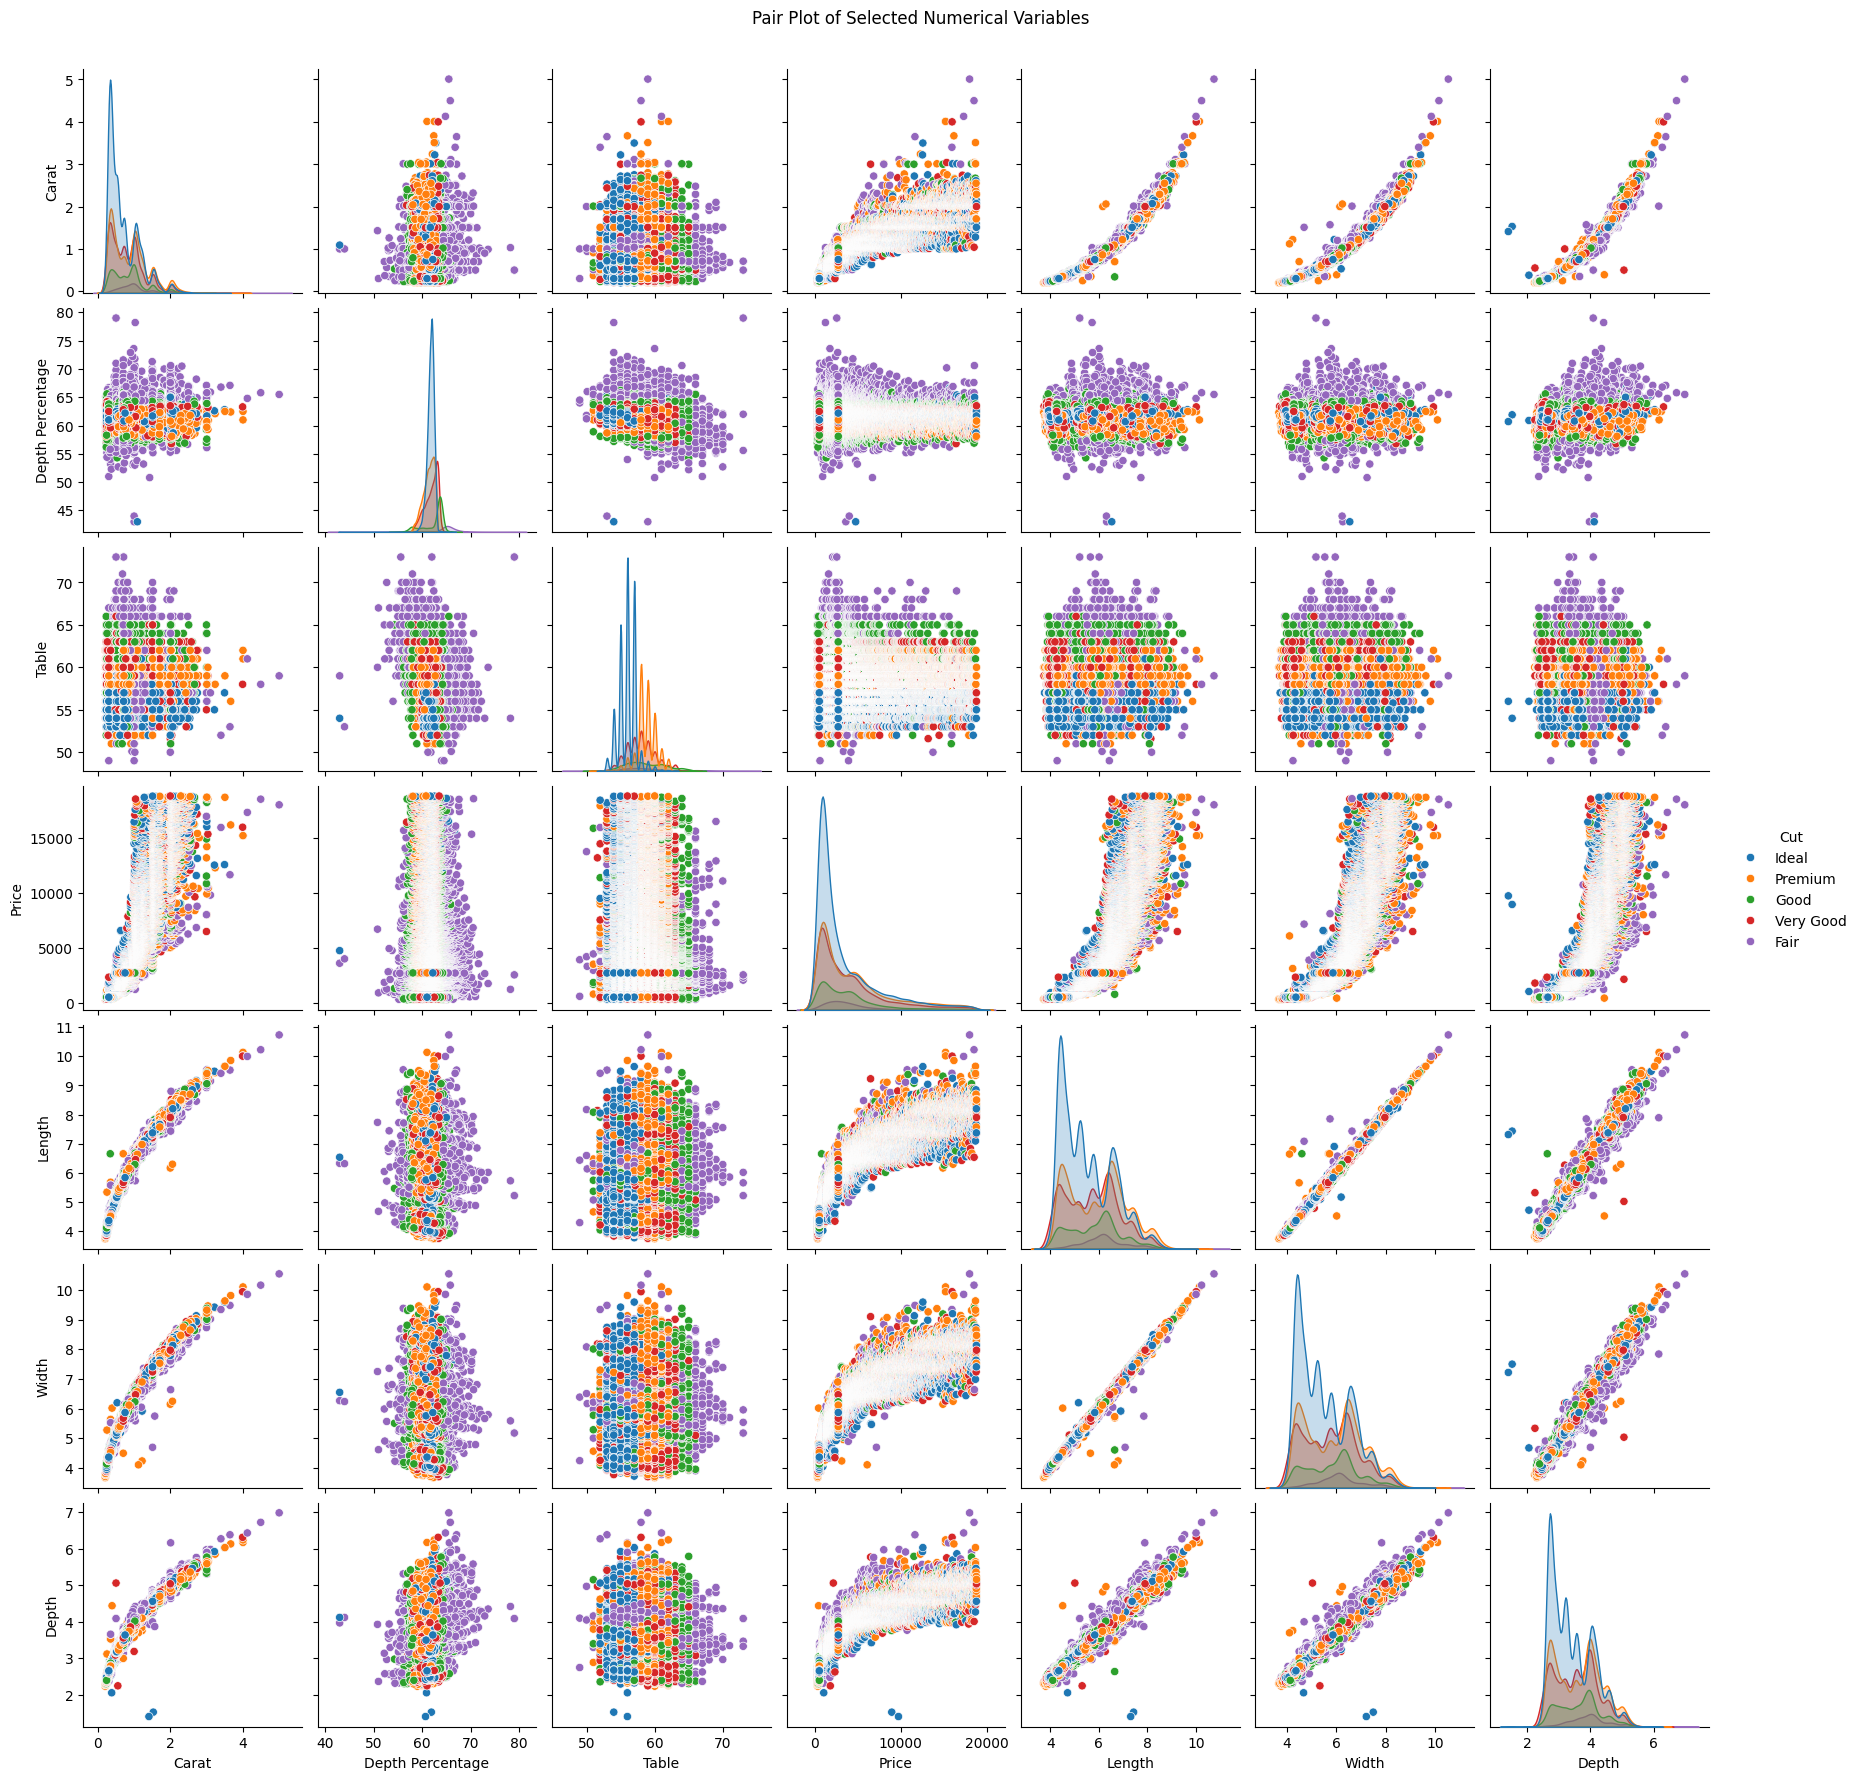

In [ ]:
sns.pairplot(clean_df, hue='Cut', x_vars =numerical_vars, y_vars= numerical_vars, diag_kind='kde')
plt.suptitle("Pair Plot of Selected Numerical Variables", y=1.02)
plt.show()

## Feature Selection and Elimination

We can drop the ID feature, it is unnecessary for us. All other categories are valuable for us at the moment.







In [ ]:
new_df = clean_df.drop(columns=['ID'])
new_df

Carat        Cut Color Clarity  Depth Percentage  Table  Price  Length  \
0       0.23      Ideal     E     SI2              61.5   55.0    326    3.95   
1       0.21    Premium     E     SI1              59.8   61.0    326    3.89   
2       0.23       Good     E     VS1              56.9   65.0    327    4.05   
3       0.29    Premium     I     VS2              62.4   58.0    334    4.20   
4       0.31       Good     J     SI2              63.3   58.0    335    4.34   
...      ...        ...   ...     ...               ...    ...    ...     ...   
53935   0.72      Ideal     D     SI1              60.8   57.0   2757    5.75   
53936   0.72       Good     D     SI1              63.1   55.0   2757    5.69   
53937   0.70  Very Good     D     SI1              62.8   60.0   2757    5.66   
53938   0.86    Premium     H     SI2              61.0   58.0   2757    6.15   
53939   0.75      Ideal     D     SI2              62.2   55.0   2757    5.83   

       Width  Depth  Cut_encoded  Clarity_encoded  Color_encoded  
0       3.98   2.43            2                1              5  
1       3.84   2.31            3                2              5  
2       4.07   2.31            1                4              5  
3       4.23   2.63            3                3              1  
4       4.35   2.75            1                1              0  
...      ...    ...          ...              ...            ...  
53935   5.76   3.50            2                2              6  
53936   5.75   3.61            1                2              6  
53937   5.68   3.56            4                2              6  
53938   6.12   3.74            3                1              2  
53939   5.87   3.64            2                1              6  

[53911 rows x 13 columns]

## Data Visualization

In this section, we'll observe the relationships between the categories, especially with our target variable, price.

<Axes: >

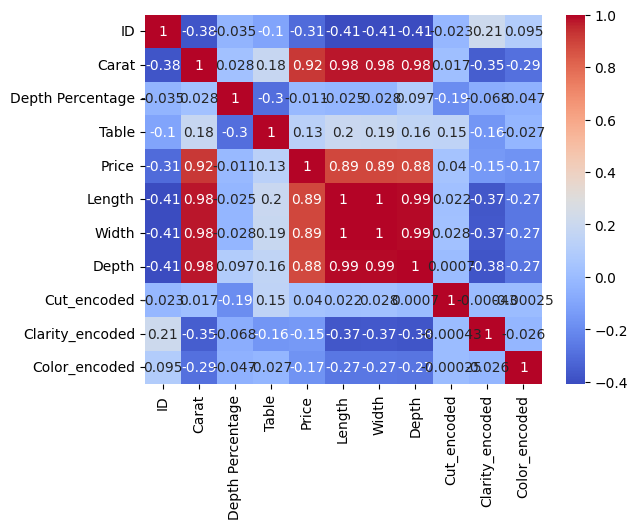

In [ ]:
sns.heatmap(clean_df.select_dtypes(["int","float"]).corr(), annot=True,cmap= "coolwarm")

### The Visualization of Price

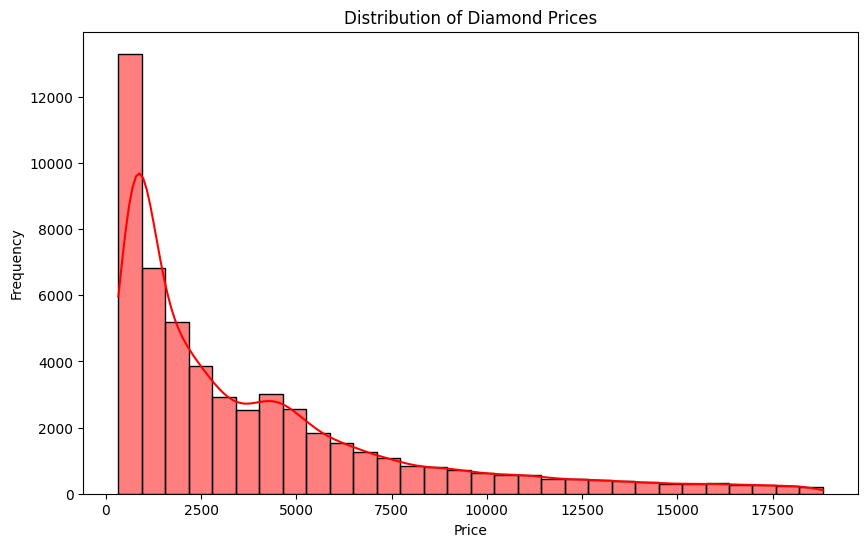

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(new_df['Price'], bins=30, kde=True, color='red')

plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

We can see that the price is quite intense below 2500 dollars. However, the number of high and medium priced diamonds is also quite high.

Perhaps in the following sections, we can divide the price category into several segments.

### The Visualizaiton of Carat

We can begin with the carat category to visulization.

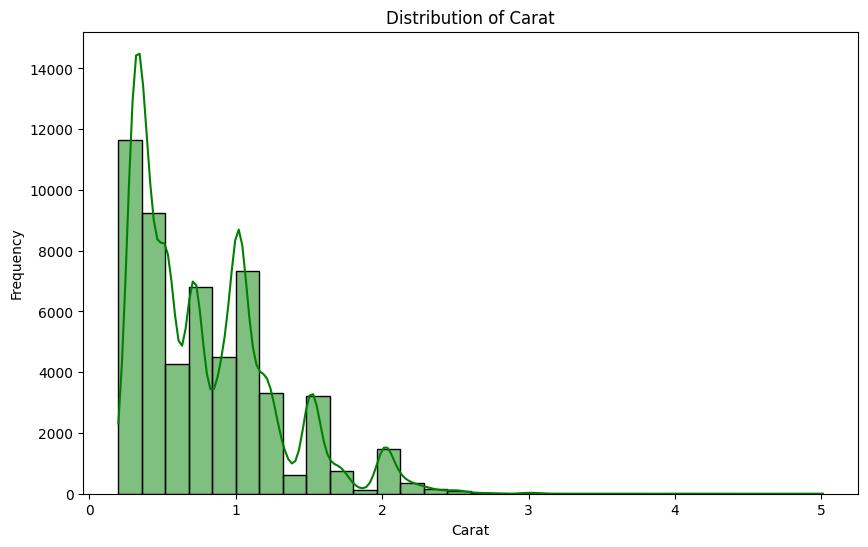

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(new_df['Carat'], bins=30, kde=True, color='green')

plt.title('Distribution of Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')

plt.show()

There more diamonds between de 0-2 carats.

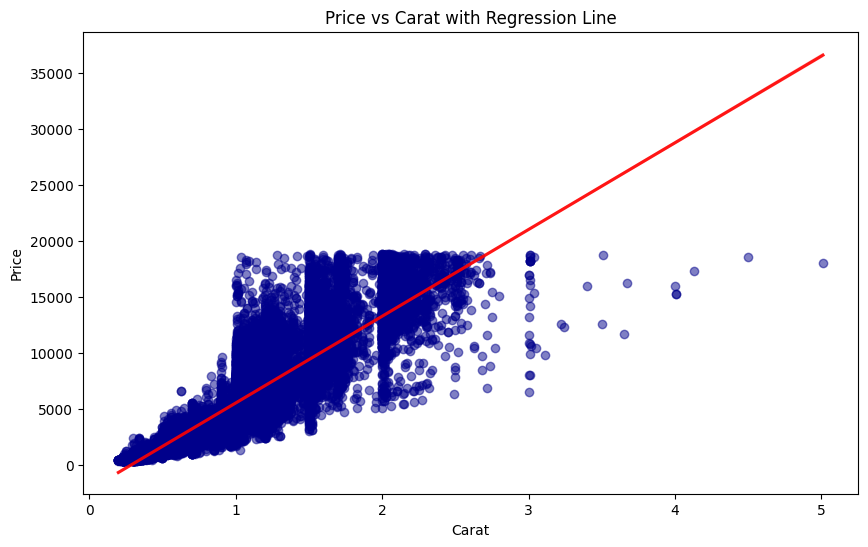

In [ ]:
plt.figure(figsize=(10, 6))

sns.regplot(x='Carat', y='Price', data=new_df,scatter_kws={"color": "darkblue", "alpha":0.5} , line_kws={"color": "red", "alpha":0.9 })

plt.title('Price vs Carat with Regression Line')
plt.xlabel('Carat')
plt.ylabel('Price')

plt.show()

As the carat increases, it's clear that the price increases; however, beyond a certain point, although the carat increases, the price hasn't increased significantly

### The Visualization of Cut

As we saw above, the distribution of the cut  was not completely evenly distributed.

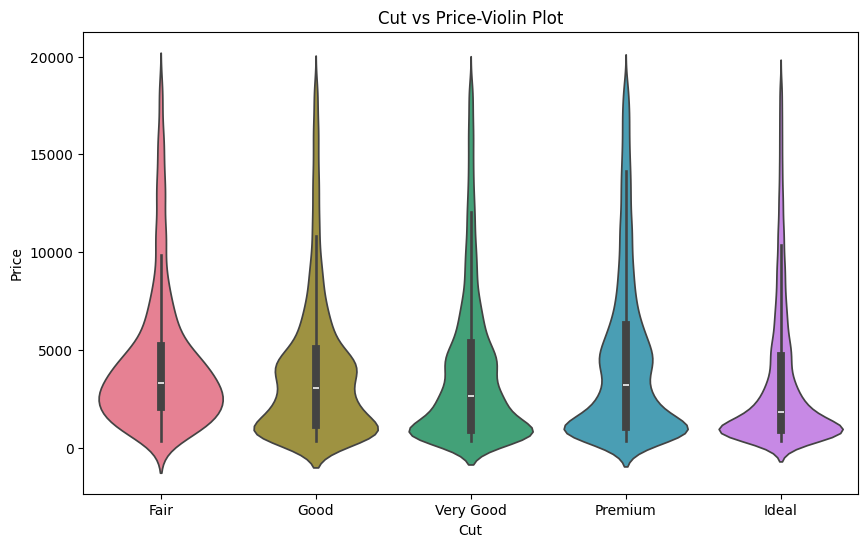

In [ ]:
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
new_df['Cut'] = pd.Categorical(new_df['Cut'], categories=cut_categories, ordered=True)

plt.figure(figsize=(10, 6))

sns.violinplot(x='Cut', y='Price', data=new_df, palette='husl', hue = 'Cut')

plt.title('Cut vs Price-Violin Plot')
plt.xlabel('Cut')
plt.ylabel('Price')

plt.show()

It appears that the average prices of diamonds from fair-quality cuts tend to exhibit higher prices. Now, let's proceed to generate a graph depicting the average prices.

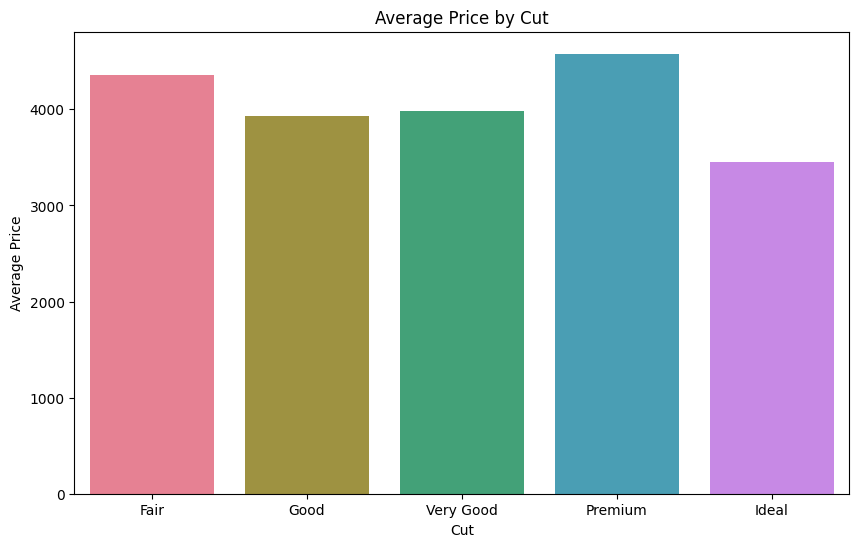

In [ ]:
cut_price_mean = new_df.groupby('Cut')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='Cut', y='Price', data=cut_price_mean, palette='husl', hue ='Cut')

plt.title('Average Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Average Price')

plt.show()

The reason for this data emerging in this way could be due to the smaller number of diamonds in the fair cut category. Additionally, we know that carat weight has a significant impact on diamond prices. This could be related to that. Therefore, we'll print a graph showing the average carat and cut with the average price and cut.

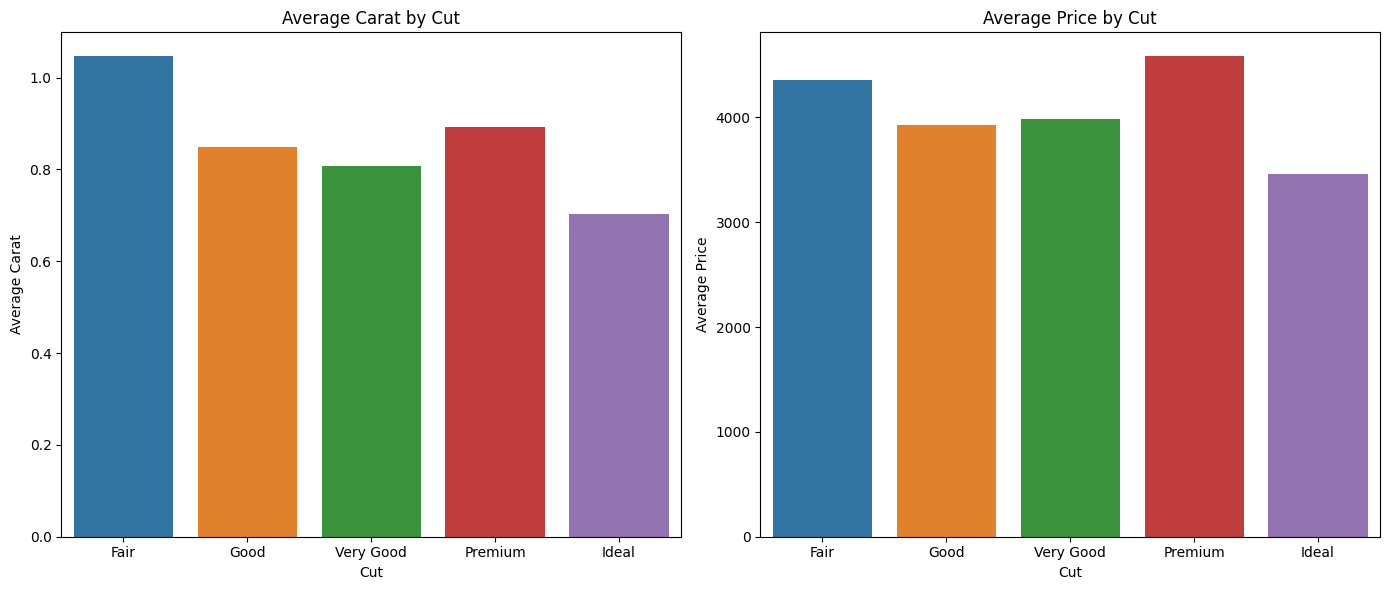

In [ ]:
average_cut = df.groupby('Cut')[['Carat', 'Price']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(average_cut, x='Cut', y='Carat', ax=axes[0], hue= 'Cut')
axes[0].set_xlabel('Cut')
axes[0].set_ylabel('Average Carat')
axes[0].set_title('Average Carat by Cut')

sns.barplot(average_cut, x='Cut', y='Price', ax=axes[1], hue = 'Cut')
axes[1].set_xlabel('Cut')
axes[1].set_ylabel('Average Price')
axes[1].set_title('Average Price by Cut')

plt.tight_layout()
plt.show()

Sure, almost the same graph.

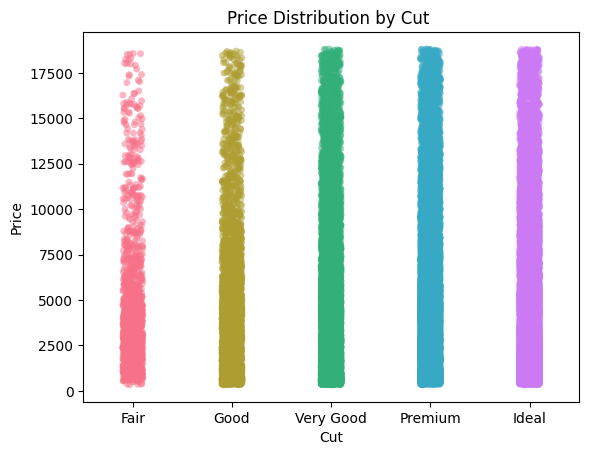

In [ ]:
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
new_df['Cut'] = pd.Categorical(new_df['Cut'], categories=cut_categories, ordered=True)


sns.stripplot(x='Cut', y='Price', data=new_df, jitter=True, palette='husl', alpha=0.5, hue ='Cut')

plt.title('Price Distribution by Cut ')
plt.xlabel('Cut')
plt.ylabel('Price')

plt.show()

The density of diamonds priced over $10,000 decreases in the fair cut category.

This suggests that diamonds in the fair cut category are more likely to be priced below $10,000. So, why does the average price appear higher? It's because the data for other cut categories have a higher number of observations, and the presence of lower-priced data points in those categories pulls down the average for those cut types.



### The Visualization of Color

Now, we will focus the color.

First, arrange the order of color labels.

In [ ]:
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
new_df['Color'] = pd.Categorical(new_df['Color'], categories=color_order, ordered=True)

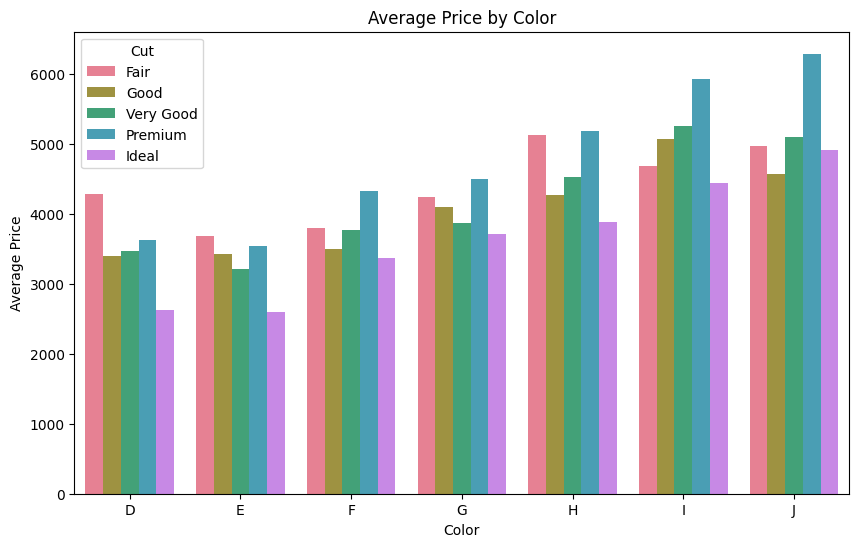

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Color', y='Price', data=new_df, order=color_order, palette='husl', hue='Cut',errorbar=None)

plt.title('Average Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Price')

plt.show()

Just like with cut quality, we also observe a decrease in average price within the color category on this graph.

We observe that as color quality increases, the average price decreases.

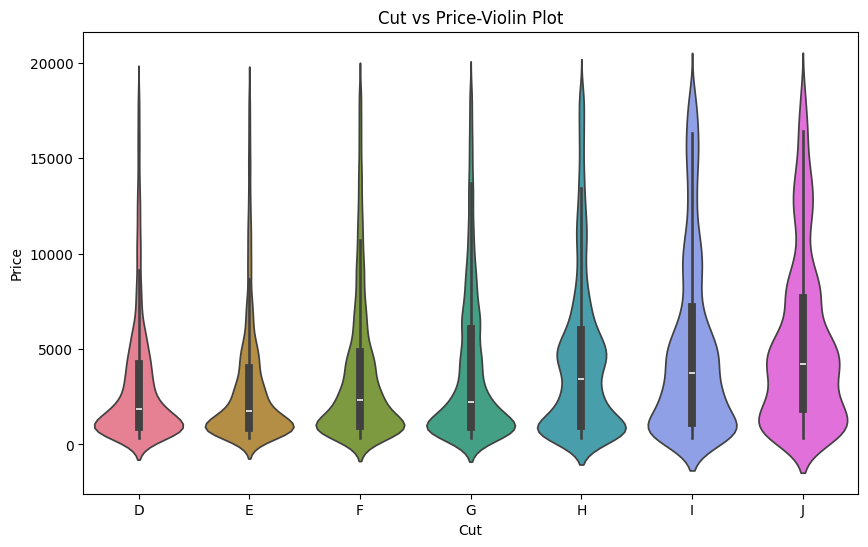

In [ ]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='Color', y='Price', data=new_df, palette='husl', hue = 'Color')

plt.title('Cut vs Price-Violin Plot')
plt.xlabel('Cut')
plt.ylabel('Price')

plt.show()

<ipython-input-69-e03b09c800dd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Color', y='Price', data = new_df, jitter=True, order=color_order, palette='husl', alpha=0.5)


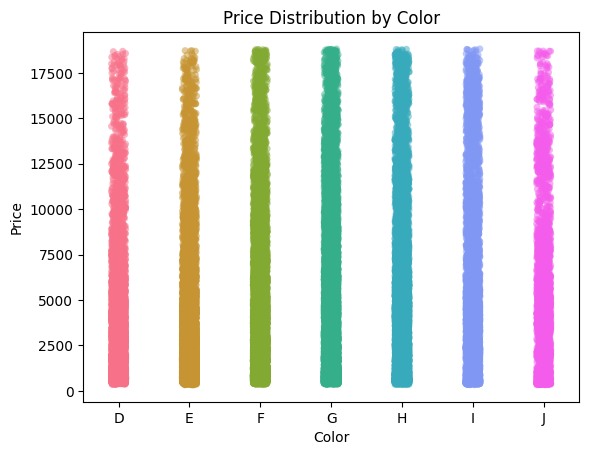

In [ ]:
sns.stripplot(x='Color', y='Price', data = new_df, jitter=True, order=color_order, palette='husl', alpha=0.5)

plt.title('Price Distribution by Color')
plt.xlabel('Color')
plt.ylabel('Price')

plt.show()

There is no density change in color category according to the average price.

In [ ]:
pivot_table = new_df.pivot_table(index='Cut', columns='Color', aggfunc='size', fill_value=0)

pivot_table

Color         D     E     F     G     H     I    J
Cut                                               
Fair        163   224   310   312   303   175  119
Good        662   933   907   869   702   522  307
Very Good  1513  2398  2164  2299  1823  1204  678
Premium    1602  2337  2330  2921  2354  1427  808
Ideal      2834  3902  3824  4882  3115  2092  896

### The Visualization of Clarity

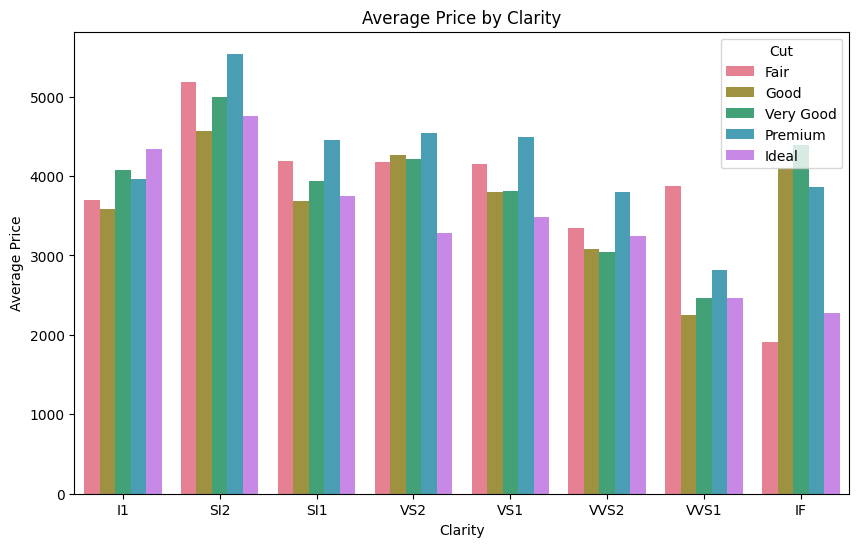

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Clarity', y='Price', data = new_df, palette='husl', hue='Cut', errorbar = None)

plt.title('Average Price by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Average Price')

plt.show()

In Clarity category, we see different things from the Color and Cut.

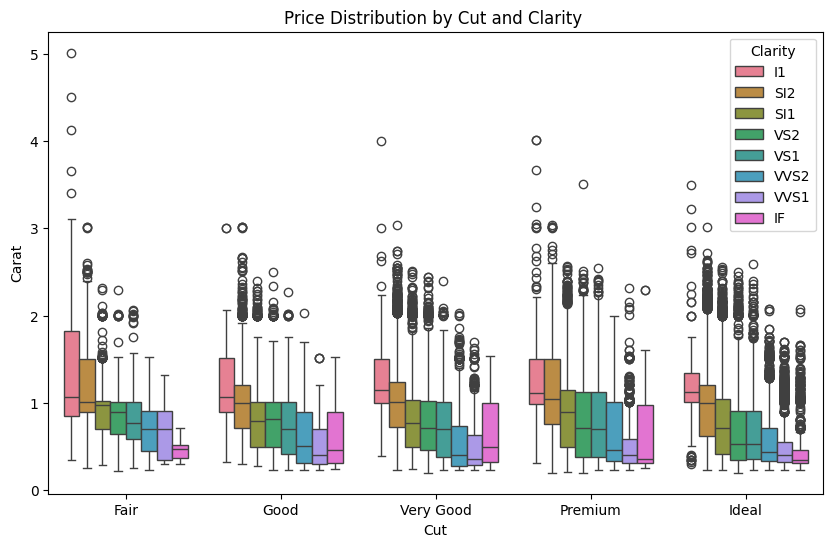

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Cut', y='Carat', data = new_df, hue = 'Clarity',   palette='husl')

plt.title('Price Distribution by Cut and Clarity ')
plt.xlabel('Cut')
plt.ylabel('Carat')

plt.show()

The reason why the average price of the Fair is higher beacuse there are some diamonds with higher carat.

## Data Transformation

In [ ]:
diamond = clean_df.drop(labels =  ['ID', 'Cut', 'Color', 'Clarity'] , axis = 1)
diamond['Price'] = pd.cut(diamond['Price'], bins=[0, 5000, 10000, 15000, 20000], labels=[0,1,2,3])



The distrubition of the price is not equal. I divide some labels to price category so that reducing the affect some distribution of the price.

# ***Machine Learning Part***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import norm

## Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diamond[['Carat', 'Depth Percentage', 'Table', 'Length', 'Width', 'Depth', 'Cut_encoded', 'Clarity_encoded', 'Color_encoded']], diamond['Price'], test_size=0.2, random_state=302)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Selection

I will use Logistic Regression, KNN, Decision Tree and Random Forest, only, because my dataset is big so the colab ram does npt support some model, especially for the hyperparameter tuning method.

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),

}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.9226
KNN Accuracy: 0.9248
Decision Tree Accuracy: 0.9281
Random Forest Accuracy: 0.9473


I wanted to apply hyperparameter tuning methods to all models, but since my dataset is large, I encountered RAM issues when running the hyperparameter tuning method in Colab. Because of this, and since my accuracy rate is already quite high, I applied the hyperparameter tuning method directly to the one with the highest accuracy.

Hyperparameter tuning method for Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

rf_best_model = random_search.best_estimator_

y_pred = rf_best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Best parameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 30}
Best score: 0.9485948178241044
Test Accuracy: 0.9475099693962719


## Model Training and Evaluation Key Points


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Precision: {precision:.4f}")
    print(f"{name} Recall: {recall:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print(f"{name} Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n")

Logistic Regression Accuracy: 0.9226
Logistic Regression Precision: 0.9218
Logistic Regression Recall: 0.9226
Logistic Regression F1 Score: 0.9221
Logistic Regression Confusion Matrix:
 [[7601  185    0    0]
 [ 226 1632  105    1]
 [   0  132  510   80]
 [   0    0  106  205]]

KNN Accuracy: 0.9248
KNN Precision: 0.9246
KNN Recall: 0.9248
KNN F1 Score: 0.9247
KNN Confusion Matrix:
 [[7584  202    0    0]
 [ 206 1647  109    2]
 [   0  122  520   80]
 [   0    4   86  221]]

Decision Tree Accuracy: 0.9281
Decision Tree Precision: 0.9282
Decision Tree Recall: 0.9281
Decision Tree F1 Score: 0.9282
Decision Tree Confusion Matrix:
 [[7581  205    0    0]
 [ 193 1668  102    1]
 [   0  106  534   82]
 [   0    3   83  225]]

Random Forest Accuracy: 0.9473
Random Forest Precision: 0.9473
Random Forest Recall: 0.9473
Random Forest F1 Score: 0.9473
Random Forest Confusion Matrix:
 [[7648  138    0    0]
 [ 146 1744   74    0]
 [   0   73  573   76]
 [   0    0   61  250]]



In [ ]:
from sklearn.model_selection import cross_val_score


cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[name] = scores
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

print("\nCross-Validation Results:")
for name, scores in cv_results.items():
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")

Logistic Regression Cross-Validation Accuracy: 0.9229 ± 0.0011
KNN Cross-Validation Accuracy: 0.9250 ± 0.0016
Decision Tree Cross-Validation Accuracy: 0.9301 ± 0.0012
Random Forest Cross-Validation Accuracy: 0.9478 ± 0.0021

Cross-Validation Results:
Logistic Regression: 0.9229 ± 0.0011
KNN: 0.9250 ± 0.0016
Decision Tree: 0.9301 ± 0.0012
Random Forest: 0.9478 ± 0.0021


We know that the price distribution is right-skewed. Now, we equalize the distribution of the price and then apply the model again.

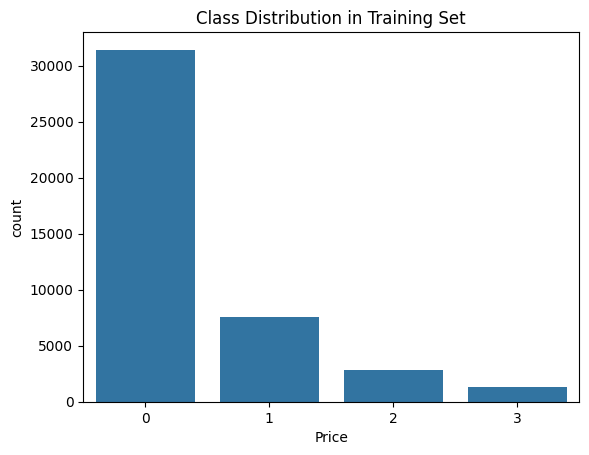

In [ ]:
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.show()

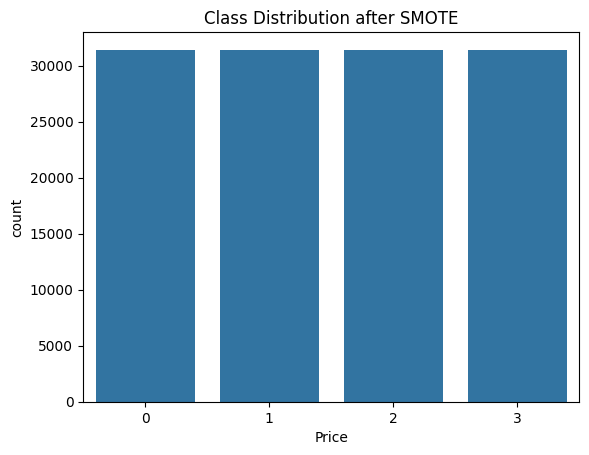

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

sns.countplot(x=y_train_resampled)
plt.title('Class Distribution after SMOTE')
plt.show()

In [ ]:
rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced')

rf_classifier.fit(X_train_scaled, y_train)
y_pred = rf_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Random Forest with Class Weights - Test Accuracy: {accuracy:.4f}")
print(f"Random Forest with Class Weights - Test Precision: {precision:.4f}")
print(f"Random Forest with Class Weights - Test Recall: {recall:.4f}")
print(f"Random Forest with Class Weights - Test F1 Score: {f1:.4f}")

Random Forest with Class Weights - Test Accuracy: 0.9496
Random Forest with Class Weights - Test Precision: 0.9495
Random Forest with Class Weights - Test Recall: 0.9496
Random Forest with Class Weights - Test F1 Score: 0.9496


There is no big change in the accuracy, so our dataset works efficientlly.

In [ ]:
for name, model in models.items():

    model.fit(X_train_resampled, y_train_resampled)
    y_pred_resampled = model.predict(X_test_scaled)

    accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
    precision_resampled = precision_score(y_test, y_pred_resampled, average='weighted')
    recall_resampled = recall_score(y_test, y_pred_resampled, average='weighted')
    f1_resampled = f1_score(y_test, y_pred_resampled, average='weighted')

    print(f"{name} - Test Accuracy: {accuracy_resampled:.4f}")
    print(f"{name} - Test Precision: {precision_resampled:.4f}")
    print(f"{name} - Test Recall: {recall_resampled:.4f}")
    print(f"{name} - Test F1 Score: {f1_resampled:.4f}")

Logistic Regression - Test Accuracy: 0.9153
Logistic Regression - Test Precision: 0.9241
Logistic Regression - Test Recall: 0.9153
Logistic Regression - Test F1 Score: 0.9183
KNN - Test Accuracy: 0.9135
KNN - Test Precision: 0.9207
KNN - Test Recall: 0.9135
KNN - Test F1 Score: 0.9160
Decision Tree - Test Accuracy: 0.9315
Decision Tree - Test Precision: 0.9325
Decision Tree - Test Recall: 0.9315
Decision Tree - Test F1 Score: 0.9319
Random Forest - Test Accuracy: 0.9478
Random Forest - Test Precision: 0.9490
Random Forest - Test Recall: 0.9478
Random Forest - Test F1 Score: 0.9483


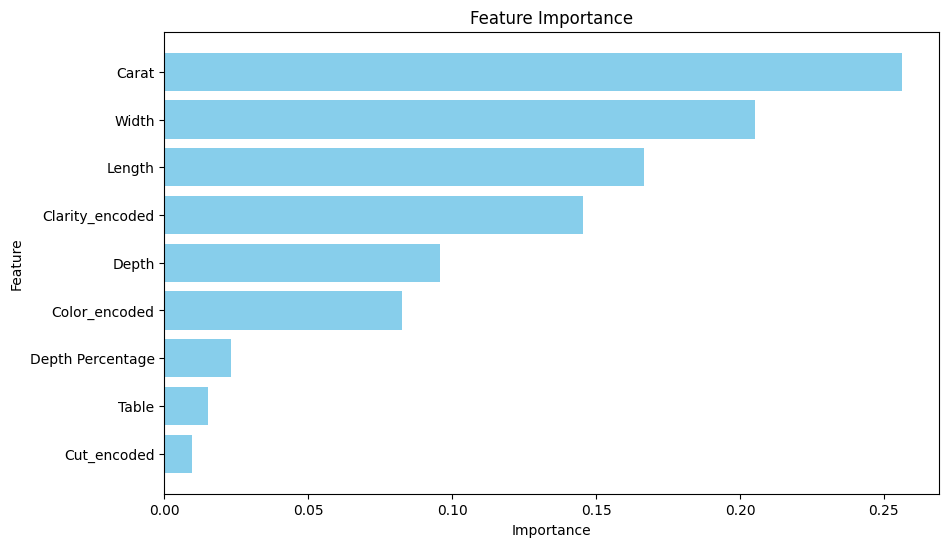

In [ ]:
feature_importances = rf_best_model.feature_importances_

feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
indices = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# ***Conclusion***

From the future importance graph, we can see that the most significant factor in determining the price of a diamond is the diamond's carat. Additionally, the size properties of the diamond, such as length, width, and depth, also have a considerable impact, although the effect of depth appears slightly less. When we examine features like clarity, color, and cut, we observe that clarity has a significant influence, but the same cannot be said for color and cut. During the exploratory data analysis, we had some observations suggesting that color and cut could have a negative impact on the price, but when we evaluate them alongside carat and consider their distributions, we see that they do not have a negative effect. However, looking at them now, it doesn't seem like their positive impact is very pronounced.
